Starting CSV file loading process from ..\_data\shapes

Paired dataset 'barbell_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'barbell_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'radial_segment_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'radial_segment_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'rectangle_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'saddle_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'sine_wave_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'star_2d': X shape (5000, 2), y shape (5000,)

Datasets available: ['barbell_2d', 'barbell_3d', 'radial_segment_2d', 'radial_segment_3d', 'rectangle_2d', 'saddle_3d', 'sine_wave_2d', 'star_2d']

Fitting model randcart...

Original randcart metrics (evaluate_tree): {'accuracy': 0.9786, 'coverage': np.float64(0.8993548387096775), 'density': np.float64(0.9600550964187328), 'f_score': np.float64(0.9287141905396403), 'depth': 8, 'splits': 68, 'leaves': 69, 'a

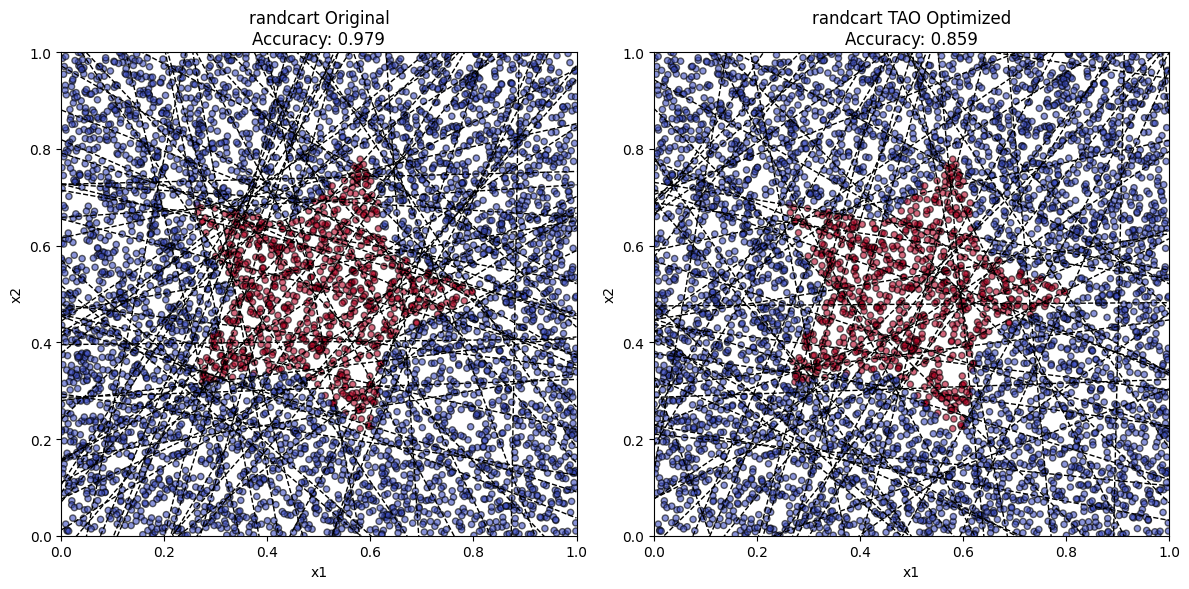

In [3]:
import time
import copy
import matplotlib.pyplot as plt
import numpy as np

from D_oblique_decision_trees.converters.dispatcher import convert_tree
from D_oblique_decision_trees.evaluation.evaluator import evaluate_tree
from D_oblique_decision_trees.visualisation import plot_decision_boundaries

from Ensembles_of_Oblique_Decision_Trees.Decision_trees.split_criteria import gini
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.segmentor import MeanSegmentor
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.RandCART import RandCARTClassifier
from optimizer import TAOOptimizer

from src.load_shapes import load_shape_dataset

def compare_tree_optimization(X, y, model_constructor, model_name, tao_params, xlim=(0,1), ylim=(0,1)):
    """
    Fit a model using the given constructor, convert it to a decision tree,
    evaluate it using evaluate_tree (which includes accuracy), print its structure,
    then optimize the tree using TAO, re-evaluate it, print the optimized structure,
    and plot the decision boundaries side by side.
    
    Also, this function returns the predictions from both trees for further comparison.
    
    Parameters:
        X (np.array): Feature matrix.
        y (np.array): Labels.
        model_constructor (callable): Function that returns an instance of a model.
        model_name (str): Identifier for the model.
        tao_params (dict): Parameters for TAOOptimizer.
        xlim (tuple): x-axis limits for plots.
        ylim (tuple): y-axis limits for plots.
    
    Returns:
        tuple: (tree_original, tree_optimized, preds_original, preds_optimized)
    """
    # 1. Fit the model.
    model = model_constructor()
    print(f"Fitting model {model_name}...")
    start_fit = time.time()
    model.fit(X, y)
    end_fit = time.time()
    training_time = end_fit - start_fit

    # 2. Convert the fitted model into a decision tree.
    tree_original = convert_tree(model, model_type=model_name)
    
    # 3. Evaluate the original tree.
    metrics_original = evaluate_tree(tree_original, X, y, training_time=training_time)
    print(f"\nOriginal {model_name} metrics (evaluate_tree): {metrics_original}\n")
    
    # print("Original Tree Structure:")
    # print_tree_structure(tree_original)
    
    # 4. **Deep Copy the Tree** before running TAO so the original remains unchanged.
    tree_for_optimization = copy.deepcopy(tree_original)
    
    # 5. Apply TAO optimization on the copied tree.
    tao_optimizer = TAOOptimizer(**tao_params)
    print("\nOptimizing tree with TAO algorithm...")
    start_tao = time.time()
    tree_optimized = tao_optimizer.optimize(tree_for_optimization, X, y)
    end_tao = time.time()
    tao_time = end_tao - start_tao
    total_time = training_time + tao_time
    
    # 6. Evaluate the optimized tree.
    metrics_optimized = evaluate_tree(tree_optimized, X, y, training_time=total_time)
    print(f"\nTAO Optimized {model_name} metrics (evaluate_tree): {metrics_optimized}\n")
    
    # print("Optimized Tree Structure:")
    # print_tree_structure(tree_optimized)
    
    # 7. Compute predictions from both trees.
    preds_original = np.array([tree_original.predict(x) for x in X])
    preds_optimized = np.array([tree_optimized.predict(x) for x in X])
    
    # 8. Plot decision boundaries side by side.
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    plt.sca(axes[0])
    plot_decision_boundaries(tree_original, X, y, ax=axes[0], xlim=xlim, ylim=ylim)
    axes[0].set_title(f"{model_name} Original\nAccuracy: {metrics_original.get('accuracy', 0):.3f}")
    
    plt.sca(axes[1])
    plot_decision_boundaries(tree_optimized, X, y, ax=axes[1], xlim=xlim, ylim=ylim)
    axes[1].set_title(f"{model_name} TAO Optimized\nAccuracy: {metrics_optimized.get('accuracy', 0):.3f}")
    
    plt.tight_layout()
    plt.show()
    
    return tree_original, tree_optimized, preds_original, preds_optimized

# ----- Example Usage -----
deep_max_depth = 8
model_constructor = lambda: RandCARTClassifier(impurity=gini, segmentor=MeanSegmentor(), max_depth=deep_max_depth)
model_name = "randcart"
tao_params = {
    "max_iterations": 100,
    "tol": 1e-5,
    "learning_rate": 0.01,
    "lambda_reg": 0.01
}

all_data = load_shape_dataset()
X, y = all_data["star_2d"]

tree_original, tree_optimized, preds_original, preds_optimized = compare_tree_optimization(
    X, y, model_constructor, model_name, tao_params, xlim=(0,1), ylim=(0,1)
)


Starting CSV file loading process from ..\_data\shapes

Paired dataset 'barbell_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'barbell_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'radial_segment_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'radial_segment_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'rectangle_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'saddle_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'sine_wave_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'star_2d': X shape (5000, 2), y shape (5000,)

Datasets available: ['barbell_2d', 'barbell_3d', 'radial_segment_2d', 'radial_segment_3d', 'rectangle_2d', 'saddle_3d', 'sine_wave_2d', 'star_2d']


TAO Parameter Grid Search:   4%|▎         | 1/27 [00:00<00:25,  1.02it/s]

Convergence reached at iteration 3.


TAO Parameter Grid Search:  11%|█         | 3/27 [00:27<03:54,  9.78s/it]

Convergence reached at iteration 46.


TAO Parameter Grid Search:  19%|█▊        | 5/27 [01:02<05:22, 14.65s/it]

Convergence reached at iteration 99.


TAO Parameter Grid Search:  30%|██▉       | 8/27 [01:54<05:15, 16.58s/it]

Convergence reached at iteration 98.


TAO Parameter Grid Search:  59%|█████▉    | 16/27 [04:00<02:40, 14.61s/it]

Convergence reached at iteration 61.


TAO Parameter Grid Search: 100%|██████████| 27/27 [07:09<00:00, 15.92s/it]



Grid Search Results:
         tol  learning_rate  lambda_reg  accuracy  splits  leaves  max_depth
0   0.000100          0.001       0.001    0.9420      21      22          5
1   0.000100          0.001       0.010    0.9454      19      20          5
2   0.000100          0.001       0.100    0.9330      19      20          5
3   0.000100          0.010       0.001    0.8450      19      20          5
4   0.000100          0.010       0.010    0.8588      21      22          5
5   0.000100          0.010       0.100    0.9196      19      20          5
6   0.000100          0.100       0.001    0.8450      21      22          5
7   0.000100          0.100       0.010    0.8450      18      19          5
8   0.000100          0.100       0.100    0.8450      20      21          5
9   0.000010          0.001       0.001    0.9474      21      22          5
10  0.000010          0.001       0.010    0.9384      21      22          5
11  0.000010          0.001       0.100    0.9408     

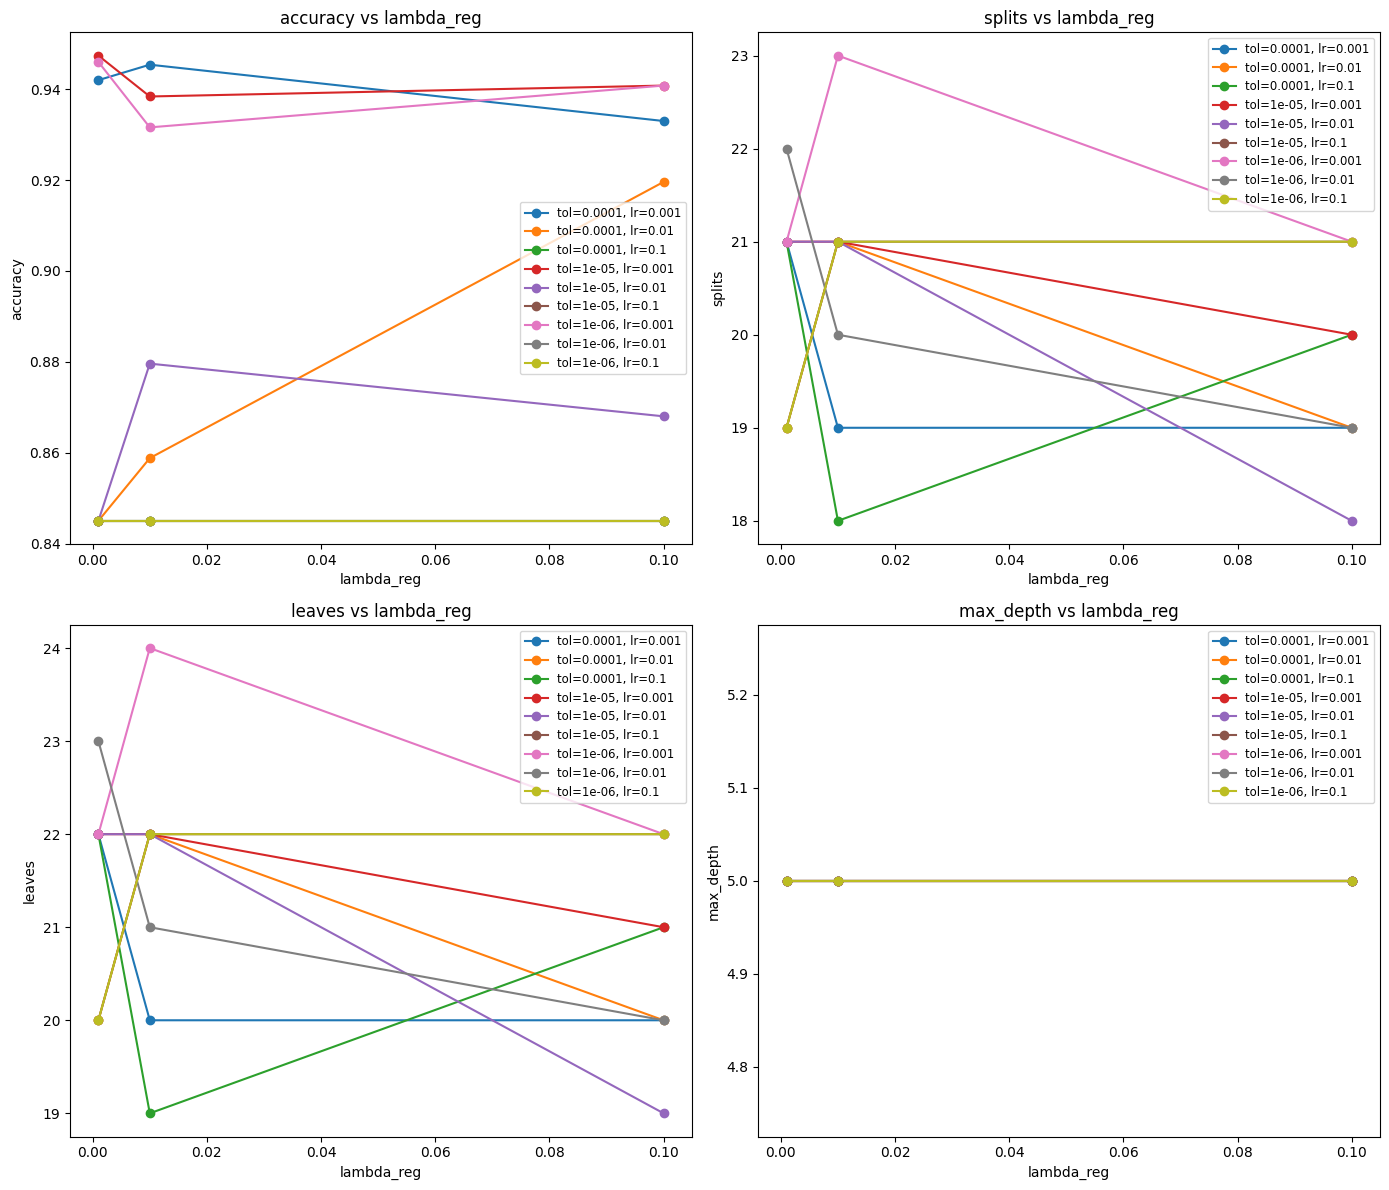

In [1]:
import time
import copy
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Import the required functions and classes from your modules.
from D_oblique_decision_trees.converters.dispatcher import convert_tree
from D_oblique_decision_trees.evaluation.evaluator import evaluate_tree
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.split_criteria import gini
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.segmentor import MeanSegmentor
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.RandCART import RandCARTClassifier
from optimizer import TAOOptimizer
from src.load_shapes import load_shape_dataset

# Define a function that runs a single TAO optimization experiment and returns metrics.
def run_tao_experiment(X, y, model_constructor, model_name, tao_params):
    """
    Runs the TAO optimization experiment with the given TAO parameters.
    Returns a dictionary with the TAO parameters, optimized tree metrics,
    and structural measures.
    """
    # 1. Fit the model.
    model = model_constructor()
    model.fit(X, y)
    
    # 2. Convert the fitted model into a decision tree.
    tree_original = convert_tree(model, model_type=model_name)
    
    # 3. Deep copy the tree so that the original remains intact.
    tree_for_optimization = copy.deepcopy(tree_original)
    
    # 4. Run TAO optimization on the copied tree.
    tao_optimizer = TAOOptimizer(**tao_params)
    tree_optimized = tao_optimizer.optimize(tree_for_optimization, X, y)
    
    # 5. Evaluate the optimized tree.
    metrics = evaluate_tree(tree_optimized, X, y)
    
    # 6. Get structural measures from the tree.
    structure = {
        "splits": tree_optimized.num_splits,
        "leaves": tree_optimized.num_leaves,
        "max_depth": tree_optimized.max_depth
    }
    
    # 7. Combine parameters and metrics into a single dictionary.
    result = {
        "tol": tao_params["tol"],
        "learning_rate": tao_params["learning_rate"],
        "lambda_reg": tao_params["lambda_reg"],
        "accuracy": metrics.get("accuracy", np.nan)
    }
    result.update(structure)
    return result

# ----- Define the parameter grid -----
# Here we choose ranges that are reasonable.
tol_values = [1e-4, 1e-5, 1e-6]
learning_rate_values = [0.001, 0.01, 0.1]
lambda_reg_values = [0.001, 0.01, 0.1]

# Load the dataset.
all_data = load_shape_dataset()
X, y = all_data["star_2d"]

# Define the model constructor and model name.
deep_max_depth = 5
model_constructor = lambda: RandCARTClassifier(impurity=gini, segmentor=MeanSegmentor(), max_depth=deep_max_depth)
model_name = "randcart"

# Create an empty list to store results.
results = []

# Create the parameter grid as a list.
grid = list(itertools.product(tol_values, learning_rate_values, lambda_reg_values))

# Loop over the grid of parameters with a progress bar.
for tol, lr, lam in tqdm(grid, desc="TAO Parameter Grid Search"):
    tao_params = {
        "max_iterations": 100,
        "tol": tol,
        "learning_rate": lr,
        "lambda_reg": lam
    }
    result = run_tao_experiment(X, y, model_constructor, model_name, tao_params)
    results.append(result)

# Convert the list of results into a pandas DataFrame.
df_results = pd.DataFrame(results)
print("\nGrid Search Results:")
print(df_results)

# ----- Plotting the results -----
# We will produce subplots for each metric of interest:
# accuracy, splits, leaves, and max_depth as functions of lambda_reg,
# with separate lines for different tol and learning_rate settings.

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
metrics_to_plot = ['accuracy', 'splits', 'leaves', 'max_depth']

for ax, metric in zip(axes.flatten(), metrics_to_plot):
    # For each combination of tol and learning_rate, plot metric vs lambda_reg.
    for tol in tol_values:
        for lr in learning_rate_values:
            subset = df_results[(df_results['tol'] == tol) & (df_results['learning_rate'] == lr)]
            # Sort by lambda_reg for a clean line.
            subset = subset.sort_values(by="lambda_reg")
            label = f"tol={tol}, lr={lr}"
            ax.plot(subset['lambda_reg'], subset[metric], marker='o', linestyle='-', label=label)
    ax.set_xlabel("lambda_reg")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs lambda_reg")
    ax.legend(fontsize='small')
plt.tight_layout()
plt.show()

Starting CSV file loading process from ..\_data\shapes

Paired dataset 'barbell_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'barbell_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'radial_segment_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'radial_segment_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'rectangle_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'saddle_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'sine_wave_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'star_2d': X shape (5000, 2), y shape (5000,)

Datasets available: ['barbell_2d', 'barbell_3d', 'radial_segment_2d', 'radial_segment_3d', 'rectangle_2d', 'saddle_3d', 'sine_wave_2d', 'star_2d']


Running TAO grid search:   4%|▎         | 1/27 [00:09<04:08,  9.56s/it]

Convergence reached at iteration 54.


Running TAO grid search:   7%|▋         | 2/27 [00:10<01:58,  4.73s/it]

Convergence reached at iteration 6.


Running TAO grid search:  11%|█         | 3/27 [00:11<01:09,  2.90s/it]

Convergence reached at iteration 3.


Running TAO grid search:  33%|███▎      | 9/27 [01:53<04:29, 14.98s/it]

Convergence reached at iteration 80.


Running TAO grid search:  59%|█████▉    | 16/27 [03:53<03:06, 16.96s/it]

Convergence reached at iteration 89.


Running TAO grid search:  67%|██████▋   | 18/27 [04:21<02:14, 15.00s/it]

Convergence reached at iteration 50.


Running TAO grid search:  70%|███████   | 19/27 [04:30<01:45, 13.21s/it]

Convergence reached at iteration 46.


Running TAO grid search: 100%|██████████| 27/27 [06:56<00:00, 15.44s/it]



Grid Search Results:
         tol  learning_rate  lambda_reg  accuracy  coverage   density  splits  \
0   0.000100          0.001       0.001    0.9144  0.050000  0.214295      19   
1   0.000100          0.001       0.010    0.9386  0.045455  0.201000      21   
2   0.000100          0.001       0.100    0.9276  0.052632  0.209789      18   
3   0.000100          0.010       0.001    0.8450  0.090909  0.317243      22   
4   0.000100          0.010       0.010    0.8450  0.125000  0.379262      21   
5   0.000100          0.010       0.100    0.8964  0.100000  0.362950      19   
6   0.000100          0.100       0.001    0.8450  0.142857  0.456556      21   
7   0.000100          0.100       0.010    0.8450  0.100000  0.374954      19   
8   0.000100          0.100       0.100    0.8450  0.200000  0.398378      23   
9   0.000010          0.001       0.001    0.9352  0.045455  0.200133      21   
10  0.000010          0.001       0.010    0.9364  0.045455  0.205048      21   
11  0.

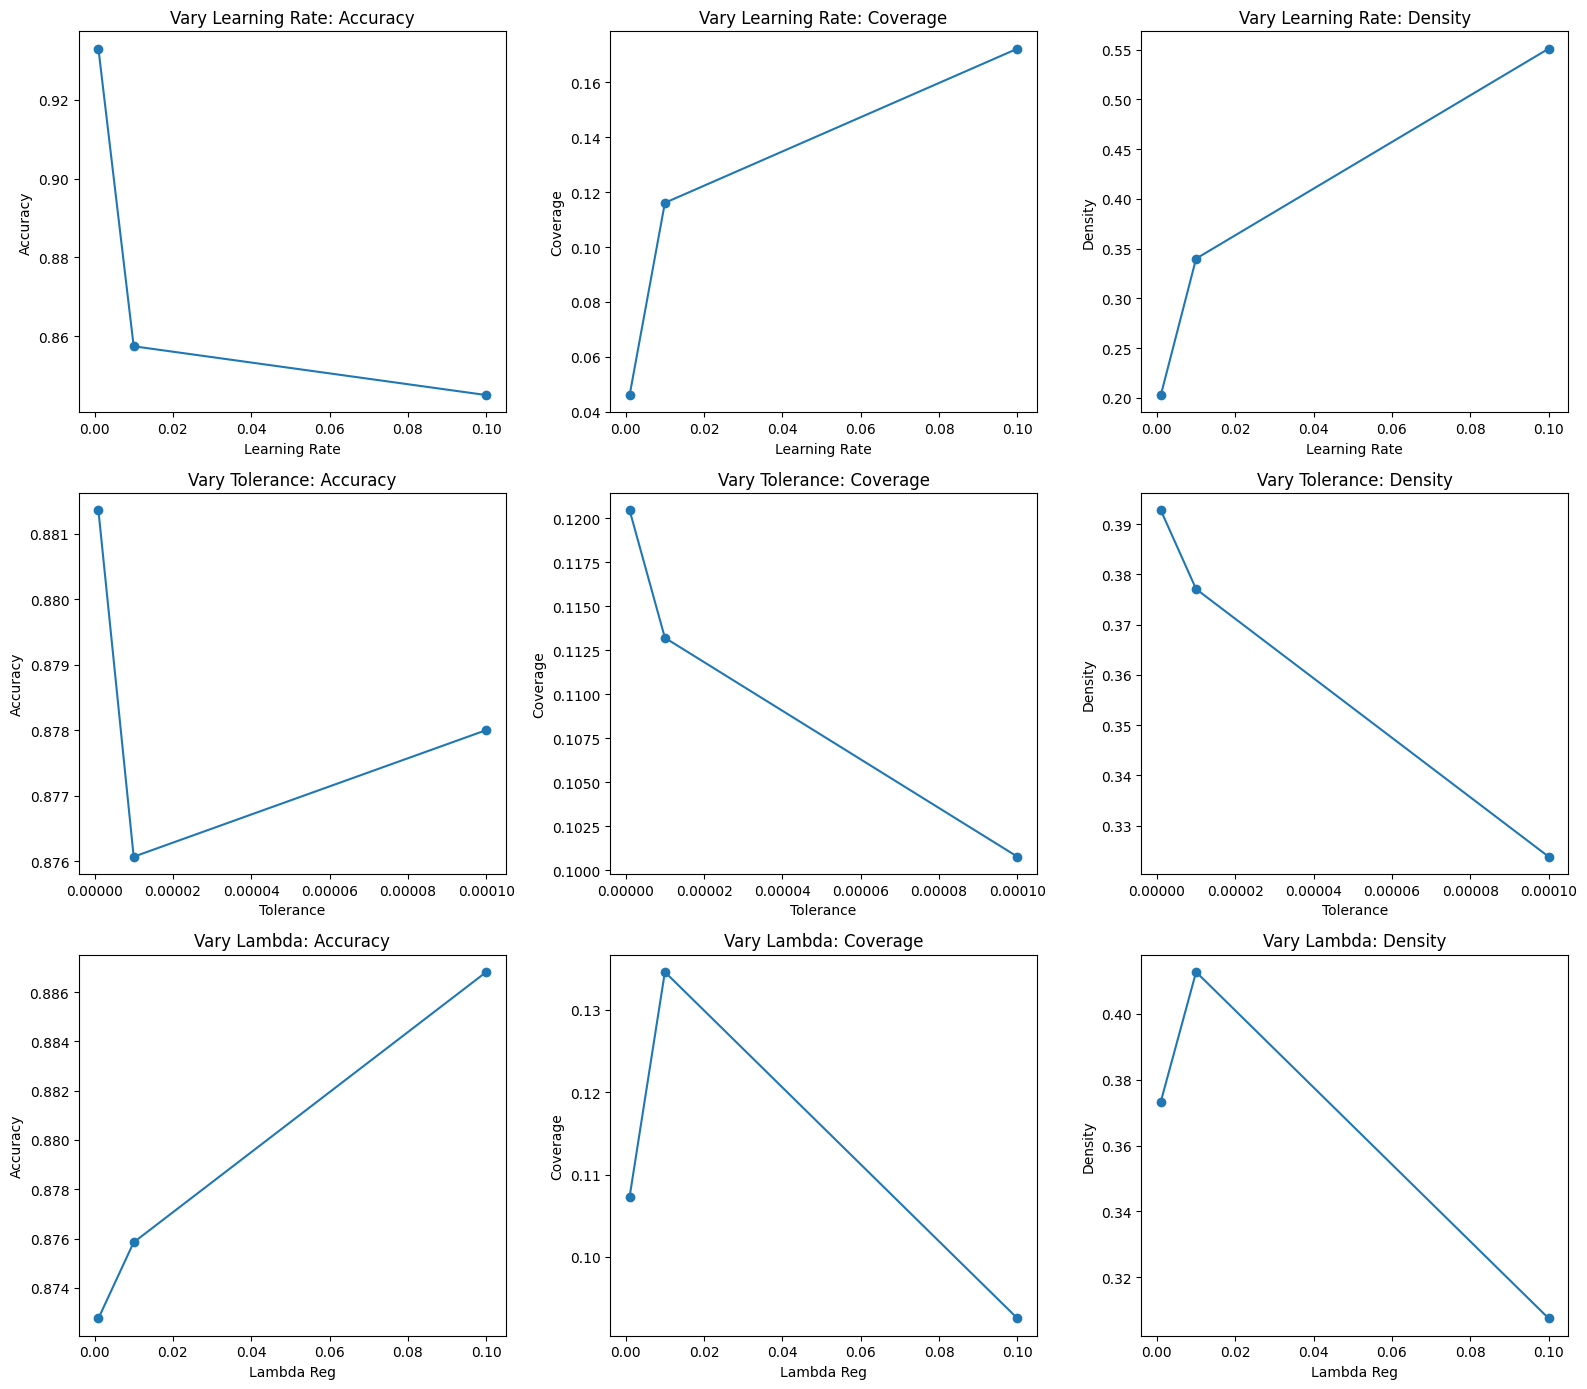

In [2]:
import time
import copy
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# Import your required functions/classes.
from D_oblique_decision_trees.converters.dispatcher import convert_tree
from D_oblique_decision_trees.evaluation.evaluator import evaluate_tree
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.split_criteria import gini
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.segmentor import MeanSegmentor
from Ensembles_of_Oblique_Decision_Trees.Decision_trees.RandCART import RandCARTClassifier
from optimizer import TAOOptimizer
from src.load_shapes import load_shape_dataset
from D_oblique_decision_trees.core.tree import LeafNode, DecisionNode
from E_TAO_algorithm.utils import compute_reduced_sets

# Define a function that runs one TAO experiment and computes metrics.
def run_tao_experiment(X, y, model_constructor, model_name, tao_params):
    """
    Fit a model, convert to tree, deep copy, optimize with TAO, and compute metrics.
    Returns a dict with TAO parameters and metrics.
    """
    # 1. Fit the model.
    model = model_constructor()
    model.fit(X, y)
    
    # 2. Convert the fitted model into a decision tree.
    tree_original = convert_tree(model, model_type=model_name)
    
    # 3. Deep copy the tree so that the original remains intact.
    tree_for_optimization = copy.deepcopy(tree_original)
    
    # 4. Run TAO optimization on the copied tree.
    tao_optimizer = TAOOptimizer(**tao_params)
    tree_optimized = tao_optimizer.optimize(tree_for_optimization, X, y)
    
    # 5. Evaluate the optimized tree.
    metrics = evaluate_tree(tree_optimized, X, y)
    accuracy = metrics.get("accuracy", np.nan)
    
    # 6. Compute structural measures.
    splits = tree_optimized.num_splits
    leaves = tree_optimized.num_leaves
    max_depth = tree_optimized.max_depth
    
    # 7. Compute "coverage" and "density" from reduced sets.
    reduced = compute_reduced_sets(tree_optimized, X)
    leaf_coverages = [len(reduced[node]) for node in reduced if isinstance(node, LeafNode)]
    decision_coverages = [len(reduced[node]) for node in reduced if isinstance(node, DecisionNode)]
    # Coverage: average fraction of samples reaching leaves.
    coverage = np.mean(leaf_coverages) / len(X) if leaf_coverages else np.nan
    # Density: average fraction of samples reaching decision nodes.
    density = np.mean(decision_coverages) / len(X) if decision_coverages else np.nan

    result = {
        "tol": tao_params["tol"],
        "learning_rate": tao_params["learning_rate"],
        "lambda_reg": tao_params["lambda_reg"],
        "accuracy": accuracy,
        "coverage": coverage,
        "density": density,
        "splits": splits,
        "leaves": leaves,
        "max_depth": max_depth
    }
    return result

# ----- Define the parameter grid -----
tol_values = [1e-4, 1e-5, 1e-6]
learning_rate_values = [0.001, 0.01, 0.1]
lambda_reg_values = [0.001, 0.01, 0.1]

# Load the dataset.
all_data = load_shape_dataset()
X, y = all_data["star_2d"]

# Define the model constructor and model name.
deep_max_depth = 5
model_constructor = lambda: RandCARTClassifier(impurity=gini, segmentor=MeanSegmentor(), max_depth=deep_max_depth)
model_name = "randcart"

# Run grid search with a progress bar.
results = []
grid = list(itertools.product(tol_values, learning_rate_values, lambda_reg_values))
for tol, lr, lam in tqdm(grid, desc="Running TAO grid search"):
    tao_params = {
        "max_iterations": 100,
        "tol": tol,
        "learning_rate": lr,
        "lambda_reg": lam
    }
    res = run_tao_experiment(X, y, model_constructor, model_name, tao_params)
    results.append(res)

# Convert results into a DataFrame.
df_results = pd.DataFrame(results)
print("\nGrid Search Results:")
print(df_results)

# ----- Aggregation for plotting -----
# For each parameter, we average over the other parameters.
# Row 1: Vary learning_rate.
lr_group = df_results.groupby("learning_rate").mean().reset_index()
# Row 2: Vary tol.
tol_group = df_results.groupby("tol").mean().reset_index()
# Row 3: Vary lambda_reg.
lam_group = df_results.groupby("lambda_reg").mean().reset_index()

# ----- Plotting: 3 rows x 3 columns.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14), sharey=False)

# Define the metrics and labels for columns.
metrics = ["accuracy", "coverage", "density"]
col_titles = ["Accuracy", "Coverage", "Density"]

# Row 1: x-axis = learning_rate.
for j, metric in enumerate(metrics):
    axes[0, j].plot(lr_group["learning_rate"], lr_group[metric], marker="o", linestyle="-")
    axes[0, j].set_xlabel("Learning Rate")
    axes[0, j].set_ylabel(metric.capitalize())
    axes[0, j].set_title(f"Vary Learning Rate: {col_titles[j]}")

# Row 2: x-axis = tol.
for j, metric in enumerate(metrics):
    axes[1, j].plot(tol_group["tol"], tol_group[metric], marker="o", linestyle="-")
    axes[1, j].set_xlabel("Tolerance")
    axes[1, j].set_ylabel(metric.capitalize())
    axes[1, j].set_title(f"Vary Tolerance: {col_titles[j]}")

# Row 3: x-axis = lambda_reg.
for j, metric in enumerate(metrics):
    axes[2, j].plot(lam_group["lambda_reg"], lam_group[metric], marker="o", linestyle="-")
    axes[2, j].set_xlabel("Lambda Reg")
    axes[2, j].set_ylabel(metric.capitalize())
    axes[2, j].set_title(f"Vary Lambda: {col_titles[j]}")

plt.tight_layout()
plt.show()
